In [1]:
#hide
%matplotlib inline
import math
import requests
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

states_url = "https://covidtracking.com/api/states/daily"
case_threshold = 100

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
default_cycler = cycler(linestyle=['-', '--', ':', '-.']) * cycler(color=colors)

r = requests.get(states_url)
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df = states_df[['date', 'state', 'positive', 'negative']].sort_values('date')
        
formatter = ScalarFormatter()
formatter.set_scientific(False)

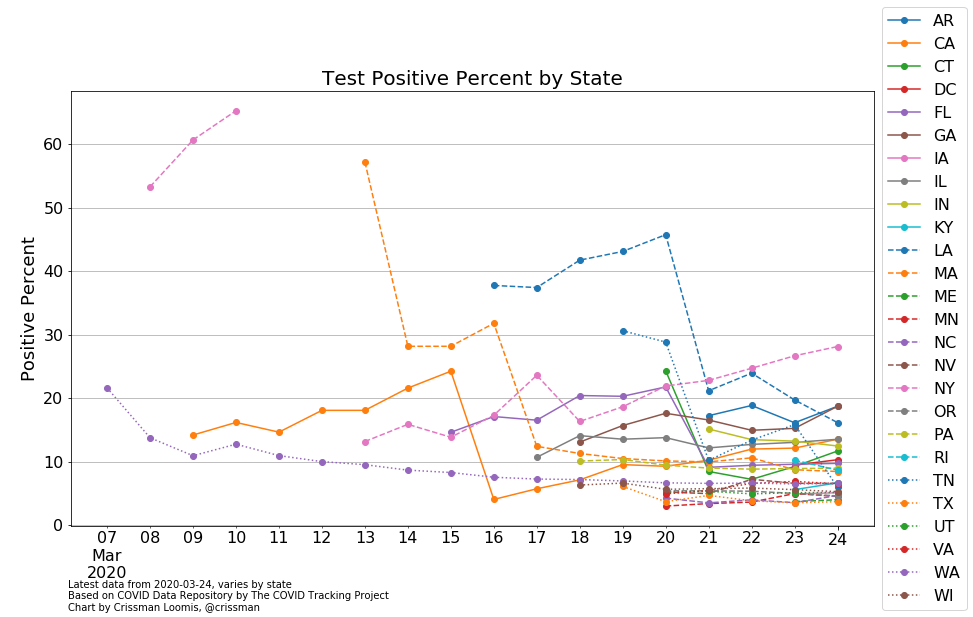

In [2]:
#collapse-hide

# re-using the df's from above
cols = {}
pd.options.mode.chained_assignment = None  # default='warn'

invalid_negative_count_states = ['AZ', 'MD', 'OH', 'CO', 'MS', 'MI', 'SC', 'NJ', 'AL', 'MO']

for state in states_df.state.unique():
    tests = states_df[(states_df.state == state) & (states_df.positive > case_threshold)]
    tests['percent'] = tests['positive'] / (tests['positive'] + tests['negative']) * 100
    tests = tests.set_index('date').percent
    if len(tests) > 1 and not state in invalid_negative_count_states:
        cols[state] = tests

fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
ax.set_prop_cycle(default_cycler)

pd.concat(cols, axis=1).plot(ax=ax, marker='o')
plt.grid(axis='y')
plt.title('Test Positive Percent by State', fontsize=BIGGER_SIZE)
plt.ylabel('Positive Percent')
plt.xlabel(' ')
plt.annotate(f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Based on COVID Data Repository by The COVID Tracking Project\n'
             'Chart by Crissman Loomis, @crissman', 
             (0.07, .01), xycoords='figure fraction', fontsize=10);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(formatter)

In [3]:
#hide
fig.savefig('../images/covid-positive-tests-states.png')

This visualization was made by [Crissman Loomis](https://twitter.com/crissman)[^1].

[^1]:  Data sourced from ["The COVID Tracking Project"](https://covidtracking.com/). Updated hourly by [GitHub Actions](https://github.com/features/actions).